In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_circles, make_classification , make_moons
import matplotlib.pyplot as plt

In [2]:
input_size=3

output_size=3

layers =[4,3]

In [3]:
def softmax(a):
    e_a = np.exp(a)
    
    res = e_a /np.sum(e_a,axis=1, keepdims=True)
    return res

In [4]:
class NeuralNetwork():
    def __init__(self, input_size,layers,output_size):
        np.random.seed(0)
        
        model  = {}
        
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
        self.activation_outputs = None
        
    
    def one_hot_vector(self,y,c):
        m = y.shape[0]
        
        y_hot  = np.zeros((m,c))
        y_hot[np.arange(m),y ] = 1
        return y_hot 
        
        
    def loss(self,y_hot, y_pred):
        L = - np.mean(y_hot*np.log(y_pred))
        return L
             
        
    def forward(self,X):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        
        Z1 = np.dot(X,W1) + b1
        A1 = np.tanh(Z1)
        
        Z2 = np.dot(A1,W2) + b2
        A2 = np.tanh(Z2)
        
        Z3 = np.dot(A2,W3) + b3
        y_ = softmax(Z3)

        self.activation_outputs = (A1,A2,y_)
        return y_
    
    def backward(self, X, y, learning_rate = 0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        m = X.shape[0]
        
        A1,A2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(A2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1 - np.square(A2))*np.dot(delta3,W3.T)
        dw2 = np.dot(A1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1- np.square(A1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        
    
    def train(self,X,y,learning_rate=0.001, epochs=500, logs=False):
        training_loss =  []
        classes = len(np.unique(y))
        
        y_hot = self.one_hot_vector(y, classes)
        
        for ix in range(epochs):
            
            y_pred = self.forward(X)
            l = self.loss(y_hot, y_pred)
            training_loss.append(l)
            self.backward(X,y_hot, learning_rate)
            if logs:
                if(ix % 10 ==0):
                    print("Epoch %d Loss %0.4f"%(ix,l))
            
        return training_loss
        
    
    
    def predict(self,X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        A1,A2,y_ = self.activation_outputs
        
        print("W1 shape " , W1.shape)
        print("b1 shape " , b1.shape)
        print("A1 shape " , A1.shape)
        print()
        
        print("W2 shape " , W2.shape)
        print("b2 shape " , b2.shape)
        print("A2 shape " , A2.shape)
        print()
        
        print("W3 shape " , W3.shape)
        print("b3 shape " , b3.shape)
        print("y_ shape " , y_.shape)

In [5]:
X,y = make_circles(n_samples=500, shuffle=True,noise=0.2, factor=0.2)

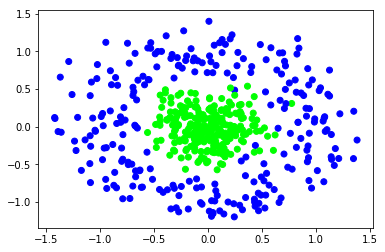

In [6]:
plt.scatter(X[:,0],X[:,1], c=y, cmap="brg")
plt.show()

In [7]:
model = NeuralNetwork(input_size=2,layers = [10,5],output_size =2)

In [8]:
losses = model.train(X,y, learning_rate=0.001,epochs=500, logs=True)

Epoch 0 Loss 0.3595
Epoch 10 Loss 0.1653
Epoch 20 Loss 0.1111
Epoch 30 Loss 0.0852
Epoch 40 Loss 0.0708
Epoch 50 Loss 0.0617
Epoch 60 Loss 0.0554
Epoch 70 Loss 0.0507
Epoch 80 Loss 0.0471
Epoch 90 Loss 0.0443
Epoch 100 Loss 0.0419
Epoch 110 Loss 0.0400
Epoch 120 Loss 0.0383
Epoch 130 Loss 0.0368
Epoch 140 Loss 0.0356
Epoch 150 Loss 0.0345
Epoch 160 Loss 0.0335
Epoch 170 Loss 0.0326
Epoch 180 Loss 0.0318
Epoch 190 Loss 0.0310
Epoch 200 Loss 0.0304
Epoch 210 Loss 0.0298
Epoch 220 Loss 0.0292
Epoch 230 Loss 0.0287
Epoch 240 Loss 0.0282
Epoch 250 Loss 0.0278
Epoch 260 Loss 0.0274
Epoch 270 Loss 0.0270
Epoch 280 Loss 0.0266
Epoch 290 Loss 0.0263
Epoch 300 Loss 0.0260
Epoch 310 Loss 0.0257
Epoch 320 Loss 0.0254
Epoch 330 Loss 0.0252
Epoch 340 Loss 0.0249
Epoch 350 Loss 0.0247
Epoch 360 Loss 0.0245
Epoch 370 Loss 0.0243
Epoch 380 Loss 0.0241
Epoch 390 Loss 0.0239
Epoch 400 Loss 0.0237
Epoch 410 Loss 0.0236
Epoch 420 Loss 0.0234
Epoch 430 Loss 0.0233
Epoch 440 Loss 0.0231
Epoch 450 Loss 0.0230

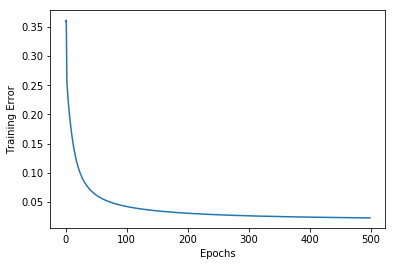

In [9]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.show()

In [10]:
model.summary()

W1 shape  (2, 10)
b1 shape  (1, 10)
A1 shape  (500, 10)

W2 shape  (10, 5)
b2 shape  (1, 5)
A2 shape  (500, 5)

W3 shape  (5, 2)
b3 shape  (1, 2)
y_ shape  (500, 2)


In [11]:
y_pred  = model.predict(X)

In [12]:
training_accuracy = np.sum(y==y_pred)*100/y.shape[0]
print(training_accuracy)

98.6


In [13]:
from visualize import plot_decision_boundary

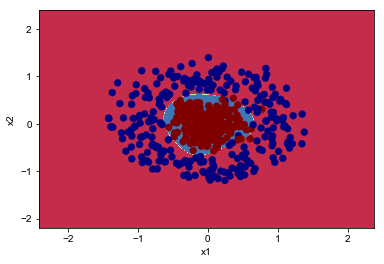

In [14]:
plot_decision_boundary(lambda x : model.predict(x),X,y)
plt.show()

##  XOR Dataset

In [15]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]])

y = np.array([0,1,1,0])

In [16]:
model =  NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
losses = model.train(X,y,learning_rate=0.01, logs=True)

Epoch 0 Loss 0.9560
Epoch 10 Loss 0.5118
Epoch 20 Loss 0.3514
Epoch 30 Loss 0.2744
Epoch 40 Loss 0.2279
Epoch 50 Loss 0.1927
Epoch 60 Loss 0.1644
Epoch 70 Loss 0.1413
Epoch 80 Loss 0.1224
Epoch 90 Loss 0.1068
Epoch 100 Loss 0.0939
Epoch 110 Loss 0.0832
Epoch 120 Loss 0.0742
Epoch 130 Loss 0.0666
Epoch 140 Loss 0.0602
Epoch 150 Loss 0.0548
Epoch 160 Loss 0.0501
Epoch 170 Loss 0.0461
Epoch 180 Loss 0.0426
Epoch 190 Loss 0.0395
Epoch 200 Loss 0.0368
Epoch 210 Loss 0.0344
Epoch 220 Loss 0.0323
Epoch 230 Loss 0.0304
Epoch 240 Loss 0.0287
Epoch 250 Loss 0.0271
Epoch 260 Loss 0.0257
Epoch 270 Loss 0.0244
Epoch 280 Loss 0.0233
Epoch 290 Loss 0.0222
Epoch 300 Loss 0.0212
Epoch 310 Loss 0.0203
Epoch 320 Loss 0.0195
Epoch 330 Loss 0.0187
Epoch 340 Loss 0.0180
Epoch 350 Loss 0.0173
Epoch 360 Loss 0.0167
Epoch 370 Loss 0.0161
Epoch 380 Loss 0.0156
Epoch 390 Loss 0.0150
Epoch 400 Loss 0.0146
Epoch 410 Loss 0.0141
Epoch 420 Loss 0.0137
Epoch 430 Loss 0.0133
Epoch 440 Loss 0.0129
Epoch 450 Loss 0.0125

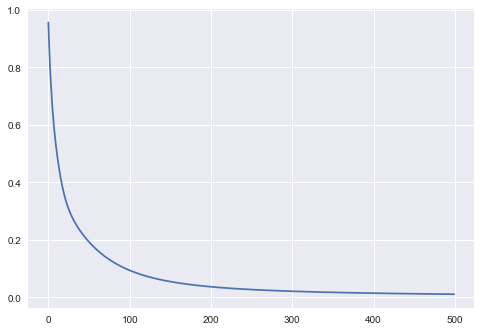

In [17]:
plt.plot(losses)

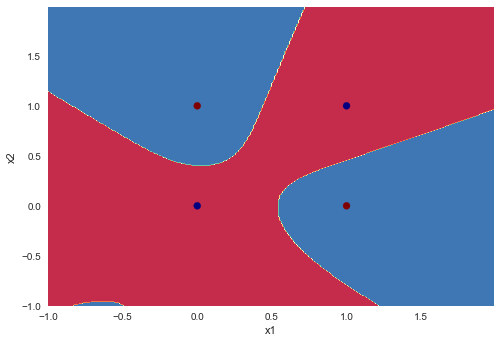

In [18]:
plot_decision_boundary(lambda x: model.predict(x),X,y)

## Test Neural Network on Non-linear Datasets

In [19]:
def get_data(d):
    if d=='moon':
        X,y = make_moons(n_samples=500,shuffle=True,noise=0.2,)
    elif d=='circle':
        X,y = make_circles(n_samples=500, shuffle=True,noise=0.2, factor=0.2)
    elif d=='classification':
        X,y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=1)
    else:
        X = np.array([
                [0,0],
                [0,1],
                [1,0],
                [1,1]])

        y = np.array([0,1,1,0])
    return X,y

In [20]:
datasets = ['moon', 'circle', 'classification', 'xor']

Training Accuracy for moon dataset 96.80


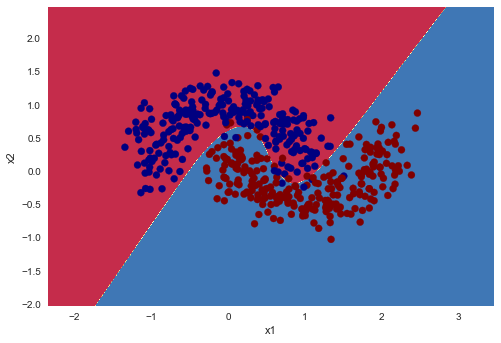

Training Accuracy for circle dataset 98.80


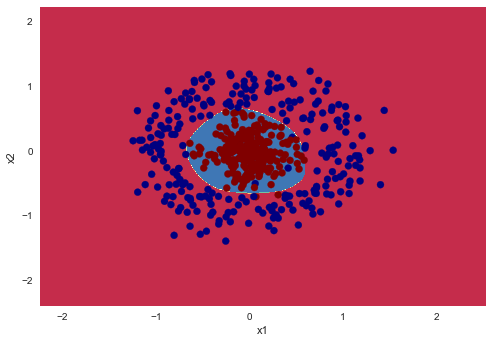

Training Accuracy for classification dataset 98.00


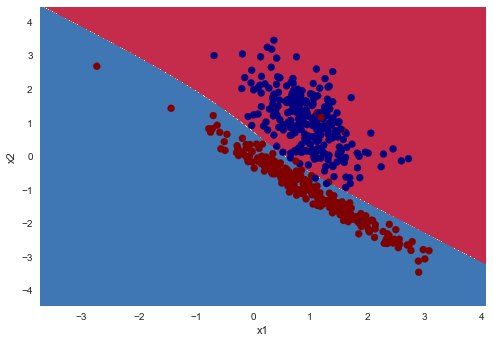

Training Accuracy for xor dataset 100.00


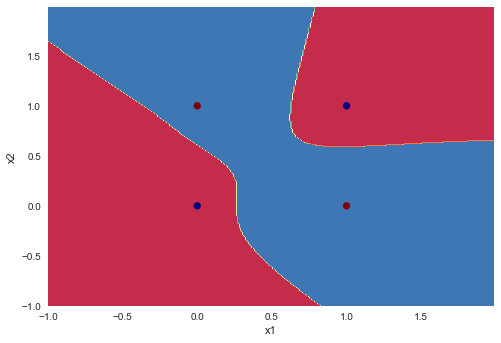

In [21]:
for d in datasets:
    X,y = get_data(d)
    model = NeuralNetwork(input_size=2,layers=[6,4],output_size=2)
    losses = model.train(X,y,learning_rate=0.001,epochs=500)
    
    y_pred = model.predict(X)
    
    accuracy = np.sum(y==y_pred)*100/y.shape[0]
    print("Training Accuracy for %s dataset %0.2f"%(d,accuracy))
    plot_decision_boundary(lambda x:model.predict(x),X,y)
    plt.show()